################################
# Cell 01:
################################

<h1> Desenho de Mapas de Calor  </h1>

<h1 style="background-color:orange;color:white;padding-top:10px;text-align:center;font-weight:bold;font-style:italic;font-size:2cm;padding-bottom:30px;"> Desenho de Mapas de Calor</h1>

 Markdown
 SHIFT + ENTER

################################
# Cell 02:
################################

<div style="margin-left:2%;">
<img style="float:left;margin:2px;height:150px;" src="https://www.analyticssteps.com/backend/media/thumbnail/6350483/7807104_1578230927_time_analysis_tittle-banner%20(1).jpg" width="32%"/>
<img style="float:left;margin:2px;height:150px;" src="https://www.analyticssteps.com/backend/media/thumbnail/6350483/7807104_1578230927_time_analysis_tittle-banner%20(1).jpg" width="32%"/>
<img style="float:left;margin:2px;height:150px;" src="https://www.analyticssteps.com/backend/media/thumbnail/6350483/7807104_1578230927_time_analysis_tittle-banner%20(1).jpg" width="32%"/>
</div>



################################
# Cell 03:
################################

<h2> Vários Gráficos em Várias Figuras </h2>

<h2 style="background-color:orange;color:white;padding-top:10px;text-align:center;font-weight:bold;font-style:italic;font-size:1cm;padding-bottom:20px;">  Vários Gráficos em Várias Figuras </h2>



 Markdown
 SHIFT + ENTER



################################
# Cell 04:
################################

# Instalação das bibliotecas
!pip install matplotlib
!pip install numpy
!pip install pandas


################################
# Cell 05:
################################


In [1]:
####################################################################
# Função "headmap()"
####################################################################


from matplotlib import pyplot as plt
import matplotlib
import numpy as np


def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
 
    '''
    Create a heatmap from a numpy array and two lists of labels.

    Parâmetros
    ----------
    data
        Um array de forma 2D numpy (M, N).
    row_labels
        Uma lista ou matriz de comprimento M com os rótulos para as linhas.
    col_labels
        Uma lista ou matriz de comprimento N com os rótulos para as colunas.
    ax - eixos
       Uma instância `matplotlib.axes.Axes` para qual o mapa de calor é plotado. 
       Se não for dado, use os eixos correntes ou criar um novo eixo (Opcional).
    cbar_kw
       Um dicionário com argumentos para `matplotlib.Figure.colorbar` (Opcional).
    cbarlabel
       O rótulo para o "colorbar" (Opcional).
    **kwargs
       Todos os outros argumentos são encaminhados para `imshow`.
    '''


    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}


    # Desenho do mapa com associação dos dados.
    im = ax.imshow(data, **kwargs)

    # Criação da barra de cores (à direita).
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Definição das escalas nos dois eixos com os respetivos
    # rótulos
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)


    # Posicionamento dos rótulos doeixo horizontal no topo do gráfico.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)


    # Rotação dos rótulos do eixo do xx em 30º.
    # Alinhamento à direita.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Desliga as lombnas do gráfico e cria uma grelha de traço brancos. 
    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    # Definição 
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar



####################################################################
# Função "annotate_heatmap()"
####################################################################
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    '''
    Uma função para anotar um mapa de calor.

    Parâmetros
    ----------  
    im
      O AxesImage a ser rotulado.
    data
Dados usados ??para anotar. Se Nenhum, os dados da imagem são usados. Opcional.
valfmt
O formato das anotações dentro do mapa de calor. Isso deve
usar o método de formato de string, por exemplo, "$ {x:.2f}", ou ser um
`matplotlib.ticker.Formatter`. Opcional.
textcolors
Um par de cores. O primeiro é usado para valores abaixo de um limite,
o segundo para aqueles acima. Opcional.
threshold
Valor em unidades de dados de acordo com o qual as cores de textcolors são
aplicadas. Se Nenhum (o padrão) usa o meio do mapa de cores como
separação. Opcional.
**kwargs
Todos os outros argumentos são encaminhados para cada chamada para `text` usada para criar
os rótulos de texto.
'''

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


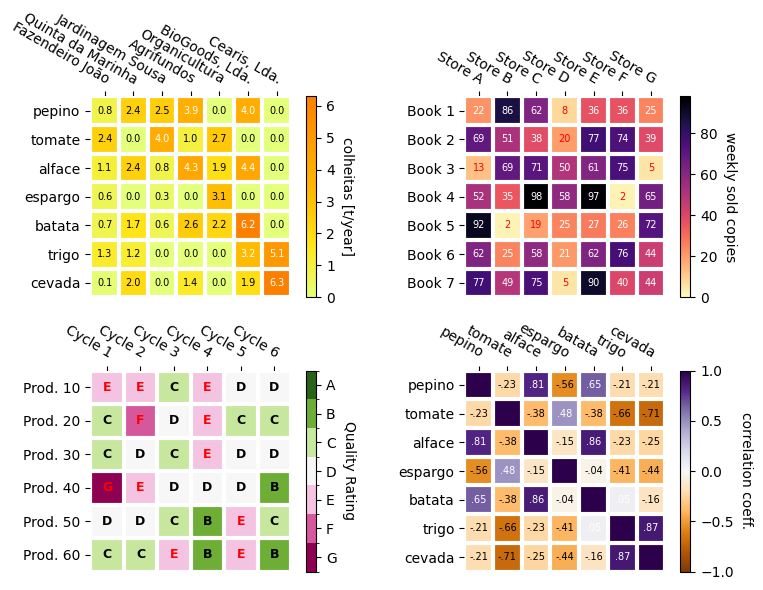

In [ ]:

####################################################################
# Função Principal
####################################################################
# 01. Importação dos módulos
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib as mpl


# 02. Definição dos dados 
vegetais = ["pepino", "tomate", "alface", "espargo",
            "batata", "trigo", "cevada"]

agricultores = ["Fazendeiro João", "Quinta da Marinha", "Jardinagem Sousa",
                "Agrifundos", "Organicultura", "BioGoods, Lda.", 
                "Cearis, Lda."]

colheitas = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


# 03. Geração de semente para conjunto de números aleatórios
np.random.seed(19680801)


fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# Replicate the above example with a different font size and colormap.

im, _ = heatmap(colheitas, vegetais, agricultores, ax=ax,
                cmap="Wistia", cbarlabel="colheitas [t/year]")
annotate_heatmap(im, valfmt="{x:.1f}", size=7)

###################################
# Segundo Heatmap
###################################
# Create some new data, give further arguments to imshow (vmin),
# use an integer format on the annotations and provide some colors.

data = np.random.randint(2, 100, size=(7, 7))
y = [f"Book {i}" for i in range(1, 8)]
x = [f"Store {i}" for i in list("ABCDEFG")]
im, _ = heatmap(data, y, x, ax=ax2, vmin=0,
                cmap="magma_r", cbarlabel="weekly sold copies")
annotate_heatmap(im, valfmt="{x:d}", size=7, threshold=20,
                 textcolors=("red", "white"))

# Sometimes even the data itself is categorical. Here we use a
# `matplotlib.colors.BoundaryNorm` to get the data into classes
# and use this to colorize the plot, but also to obtain the class
# labels from an array of classes.

###################################
# Terceiro Heatmap
###################################
data = np.random.randn(6, 6)
y = [f"Prod. {i}" for i in range(10, 70, 10)]
x = [f"Cycle {i}" for i in range(1, 7)]

qrates = list("ABCDEFG")
norm = matplotlib.colors.BoundaryNorm(np.linspace(-3.5, 3.5, 8), 7)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: qrates[::-1][norm(x)])

im, _ = heatmap(data, y, x, ax=ax3,
                cmap=mpl.colormaps["PiYG"].resampled(7), norm=norm,
                cbar_kw=dict(ticks=np.arange(-3, 4), format=fmt),
                cbarlabel="Quality Rating")

annotate_heatmap(im, valfmt=fmt, size=9, fontweight="bold", threshold=-1,
                 textcolors=("red", "black"))


###################################
# Quarto Heatmap
###################################
# We can nicely plot a correlation matrix. Since this is bound by -1 and 1,
# we use those as vmin and vmax. We may also remove leading zeros and hide
# the diagonal elements (which are all 1) by using a
# `matplotlib.ticker.FuncFormatter`.

corr_matrix = np.corrcoef(colheitas)
im, _ = heatmap(corr_matrix, vegetais, vegetais, ax=ax4,
                cmap="PuOr", vmin=-1, vmax=1,
                cbarlabel="correlation coeff.")


def func(x, pos):
    return f"{x:.2f}".replace("0.", ".").replace("1.00", "")

annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=7)


plt.tight_layout()
plt.show()


***************************************************************